In [1]:
#import needed libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

#makes sure that pandas shows all columns
pd.set_option('display.max_columns', None)

#download file into dataframe

filename = 'support2.csv'
df = pd.read_csv(filename)
df.shape

(9105, 47)

Dataset has 47 columns, 46 potential features

In [2]:
df.head()

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,NaN,7.000000,other,33.898438,20.0,0.262939,0.036995,1,0,0,metastatic,0.50,0.25,no dnr,5.0,97.0,6.000000,69.0,22.0,36.00000,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,NaN,29.000000,white,52.695312,74.0,0.001000,0.000000,3,0,0,no,0.00,0.00,NaN,NaN,43.0,17.097656,112.0,34.0,34.59375,98.00000,NaN,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,NaN,13.000000,white,20.500000,45.0,0.790894,0.664917,4,0,0,no,0.75,0.50,no dnr,17.0,70.0,8.500000,88.0,28.0,37.39844,231.65625,NaN,2.199707,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,NaN,7.000000,white,20.097656,19.0,0.698975,0.411987,1,0,0,metastatic,0.90,0.50,no dnr,3.0,75.0,9.099609,88.0,32.0,35.00000,NaN,NaN,NaN,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,NaN,18.666656,white,23.500000,30.0,0.634888,0.532959,3,0,0,no,0.90,0.90,no dnr,16.0,59.0,13.500000,112.0,20.0,37.89844,173.31250,NaN,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


In [3]:
df.describe(include = 'all')


,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
count,9105.000000,9105.000000,9105,9105.000000,9105.000000,9105.000000,9105,9105,9105.000000,7471.000000,6123,9104.000000,8.933000e+03,8217.000000,5630.000000,9023.000000,9063,9104.000000,9104.000000,9104.000000,9104.000000,9105.000000,9105.000000,9105.000000,9105,7456.000000,7472.000000,9075,9075.000000,9104.000000,8893.000000,9104.000000,9104.000000,9104.000000,6780.000000,5733.000000,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,7705,9105.000000
unique,NaN,NaN,2,NaN,NaN,NaN,8,4,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,male,NaN,NaN,NaN,ARF/MOSF w/Sepsis,ARF/MOSF,NaN,NaN,under $11k,NaN,NaN,NaN,NaN,NaN,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,no dnr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<2 mo. follow-up,NaN
freq,NaN,NaN,5125,NaN,NaN,NaN,3515,4227,NaN,NaN,2855,NaN,NaN,NaN,NaN,NaN,7191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5995,NaN,NaN,5880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3123,NaN
mean,62.650823,0.681054,NaN,0.259198,17.863042,478.449863,NaN,NaN,1.868644,11.747691,NaN,12.058546,5.999579e+04,30825.867768,28828.877838,22.610928,NaN,25.525872,37.597979,0.635870,0.520096,4.400000,0.195277,0.032510,NaN,0.618769,0.499679,NaN,14.582590,84.546408,12.347677,97.156711,23.330294,37.103341,239.529070,2.950520,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,NaN,1.888272
std,15.593710,0.466094,NaN,0.438219,22.006440,560.383272,NaN,NaN,1.344409,3.447743,NaN,24.636694,1.026488e+05,45780.820986,43604.261932,13.233248,NaN,9.899377,19.903852,0.248175,0.253343,9.126811,0.396436,0.177359,NaN,0.298367,0.304367,NaN,19.944216,27.687692,9.266329,31.559292,9.573801,1.251796,109.665593,0.875944,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,NaN,2.003763
min,18.041990,0.000000,NaN,0.000000,3.000000,3.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,NaN,0.199982,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,-88.000000,0.000000,0.000000,0.000000,0.000000,31.699220,12.000000,0.399963,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,52.797000,0.000000,NaN,0.000000,6.000000,26.000000,NaN,NaN,1.000000,10.000000,NaN,0.000000,9.740000e+03,5929.566400,5177.404300,12.000000,NaN,19.000000,23.000000,0.507690,0.342957,1.000000,0.000000,0.000000,NaN,0.500000,0.200000,NaN,4.000000,63.000000,7.000000,72.000000,18.000000,36.195310,155.093750,2.399902,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,NaN,0.000000
50%,64.856990,1.000000,NaN,0.000000,11.000000,233.000000,NaN,NaN,2.000000,12.000000,NaN,0.000000,2.502400e+04,14452.734400,13223.500000,19.500000,NaN,23.898438,34.000000,0.715942,0.574951,1.000000,0.000000,0.000000,NaN,0.700000,0.500000,NaN,9.000000,77.000000,10.599609,100.000000,24.000000,36.695310,224.000000,2.899902,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,NaN,1.000000
75%,73.998960,1.000000,NaN,1.000000,20.000000,761.000000,NaN,NaN,3.000000,14.000000,NaN,9.000000,6.459800e+04,36087.937500,34223.601600,31.666656,NaN,30.199219,49.000000,0.825928,0.725952,3.000000,0.000000,0.000000,NaN,0.900000,0.750000,NaN,17.000000,107.000000,15.298828,120.000000,28.000000,38.195310,304.750000,3.599609,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,NaN,3.000000


In [4]:
summary = df.describe(include='all')

count_values = summary.loc['count']


"""columns where percent of missing values is more then 50%"""

#find a trashhold of 50%
half_rows = len(df)/2

columns_big_null_amount = count_values[count_values < half_rows ].index.tolist()
columns_big_null_amount


['urine', 'adlp']

Should check if columns 'urine' and 'adlp' have a big cirrelation to labels
'adlp' is Index of Activities of Daily Living (ADL) filled byt the patient, there also 'adlp' that doesn't have as much missing values, also means Index of Activities of Daily Living (ADL) but filled by surrogate (family member)

In [5]:

#find columns that are not in number
columns_not_dig = df.select_dtypes(include='object')
columns_not_dig


,sex,dzgroup,dzclass,income,race,ca,dnr,sfdm2
1,male,Lung Cancer,Cancer,$11-$25k,other,metastatic,no dnr,NaN
2,female,Cirrhosis,COPD/CHF/Cirrhosis,$11-$25k,white,no,NaN,<2 mo. follow-up
3,female,Cirrhosis,COPD/CHF/Cirrhosis,under $11k,white,no,no dnr,<2 mo. follow-up
4,female,Lung Cancer,Cancer,under $11k,white,metastatic,no dnr,no(M2 and SIP pres)
5,female,ARF/MOSF w/Sepsis,ARF/MOSF,NaN,white,no,no dnr,no(M2 and SIP pres)
...,...,...,...,...,...,...,...,...
9101,male,ARF/MOSF w/Sepsis,ARF/MOSF,NaN,white,no,no dnr,NaN
9102,female,Coma,Coma,NaN,white,no,no dnr,NaN
9103,male,ARF/MOSF w/Sepsis,ARF/MOSF,NaN,white,no,no dnr,NaN
9104,male,MOSF w/Malig,ARF/MOSF,NaN,white,yes,dnr after sadm,<2 mo. follow-up


Renaming values for numbers values:
    
Sex (binary): 0 for men, 1 for women;


In [6]:
df['sex'] = df['sex'].replace({'male': 0, 'female': 1 })
df['sex'].unique() #check if worked

array([0, 1])

In [7]:
def unique_values_of_object_columns(df, list_of_column_names):
    """Function check unique values of chosen columns and returns a dictionary where key is feature name, and value is list of unique values"""
    unique_values_object = {}
    for column_name in list_of_column_names:
        unique_values_object[column_name] = df[column_name].unique()
    return unique_values_object


print(unique_values_of_object_columns(df, columns_not_dig))


{'sex': array([0, 1]), 'dzgroup': array(['Lung Cancer', 'Cirrhosis', 'ARF/MOSF w/Sepsis', 'Coma', 'CHF',
       'Colon Cancer', 'COPD', 'MOSF w/Malig'], dtype=object), 'dzclass': array(['Cancer', 'COPD/CHF/Cirrhosis', 'ARF/MOSF', 'Coma'], dtype=object), 'income': array(['$11-$25k', 'under $11k', nan, '$25-$50k', '>$50k'], dtype=object), 'race': array(['other', 'white', 'black', 'hispanic', 'asian', nan], dtype=object), 'ca': array(['metastatic', 'no', 'yes'], dtype=object), 'dnr': array(['no dnr', nan, 'dnr after sadm', 'dnr before sadm'], dtype=object), 'sfdm2': array([nan, '<2 mo. follow-up', 'no(M2 and SIP pres)', 'SIP>=30',
       'adl>=4 (>=5 if sur)', 'Coma or Intub'], dtype=object)}


### Plan of action for categorical data

1. Columns dzgroup, dzclass do not have missing data anf can be hot encoded. +
2. Income columns nan values have to be resolved, and then change for order categories 1-4 where higher income equals higher number +
3. Race column - not sure. Need to check how many missing values, and maybe drop it. Also could put nan values into unknow category. +
4. CA column (Whether the patient has cancer (yes), whether it has spread out (metastatic), or if it is healthy (no).) - no missing columns, hot-encode +
5. DNR column (Whether the patient has a do not rescuscitate (DNR) order or not. Possible values are dnr after sadm, dnr before sadm, missing, no dnr.) - check what is DNR, and how many missing values
6. SFDM2 column (Level of functional disability of the patient in a 1-5 scale, with 5 being the highest severity. Values are: {1: "no(Month 2 and SIP pres)", "adl>=4 (>=5 if sur)", "SIP>=30", "Coma or Intub", 5: "<2 mo. follow-up"}. There are 159 patients surviving 2 months for whom there were no patient or surrogate interviews. These patients have missing sfdm2.)  - figure out missing data  - this column is good for ordinal regression label, but I won;t use it in this projecy - DROP +

In [8]:
columns_to_encode = [ 'dzgroup', 'dzclass', 'ca']
encoded_df = pd.get_dummies(df, columns=columns_to_encode, dtype=int)#dtype int makes sure encoded columns filled with 1&0, not True/False

df = encoded_df

In [9]:
#handling income categorical data; 2982 missing values our of 9105
#will also hot encode with additional collumn of 'unknown' income

income_values = df['income'].unique()
print(income_values)

#put income in a variable to be able drop the column later
income_column = 'income'

df[income_column] = df[income_column].fillna('unknown')

encoded_income = pd.get_dummies(df[income_column], prefix='income', dtype=int)


# Merging the encoded columns back with the original dataframe
data_encoded = df.drop(income_column, axis=1)
data_encoded = pd.concat([data_encoded, encoded_income], axis=1)

df = data_encoded

['$11-$25k' 'under $11k' nan '$25-$50k' '>$50k']


In [10]:
#handling race categorical columns
df['race'].unique()

array(['other', 'white', 'black', 'hispanic', 'asian', nan], dtype=object)

One of the labels for future prediction will be 'death'. I am conducting Chi-Square Test to see if race has a significant impact on death. If P-value is less then 0.05 then association between two variables is significant

In [11]:
# Create a contingency table
contingency_table = pd.crosstab(df['race'], df['death'])

# Conduct the Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Squared value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi-Squared value: 17.960732173870024
P-value: 0.0012560965847243553
Degrees of Freedom: 4


From statistical perspective - race has an impact on the dataset. However, from ethical perspective using race as a feature will affect bias.
At this point, I'd rather drop it and focus on other columns that might have more correlation to potential labels.
Also want to drop SFDM2 column

In [12]:
column_to_drop = ['race', 'sfdm2']
df = df.drop(column_to_drop, axis=1)
df.head()

,age,death,sex,hospdead,slos,d.time,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,surv2m,surv6m,hday,diabetes,dementia,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc,dzgroup_ARF/MOSF w/Sepsis,dzgroup_CHF,dzgroup_COPD,dzgroup_Cirrhosis,dzgroup_Colon Cancer,dzgroup_Coma,dzgroup_Lung Cancer,dzgroup_MOSF w/Malig,dzclass_ARF/MOSF,dzclass_COPD/CHF/Cirrhosis,dzclass_Cancer,dzclass_Coma,ca_metastatic,ca_no,ca_yes,income_$11-$25k,income_$25-$50k,income_>$50k,income_under $11k,income_unknown
1,62.84998,0,0,0,5,2029,0,11.0,0.0,9715.0,NaN,NaN,7.000000,33.898438,20.0,0.262939,0.036995,1,0,0,0.50,0.25,no dnr,5.0,97.0,6.000000,69.0,22.0,36.00000,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,7.0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
2,60.33899,1,1,1,4,4,2,12.0,44.0,34496.0,NaN,NaN,29.000000,52.695312,74.0,0.001000,0.000000,3,0,0,0.00,0.00,NaN,NaN,43.0,17.097656,112.0,34.0,34.59375,98.00000,NaN,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,52.74698,1,1,0,17,47,2,12.0,0.0,41094.0,NaN,NaN,13.000000,20.500000,45.0,0.790894,0.664917,4,0,0,0.75,0.50,no dnr,17.0,70.0,8.500000,88.0,28.0,37.39844,231.65625,NaN,2.199707,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,42.38498,1,1,0,3,133,2,11.0,0.0,3075.0,NaN,NaN,7.000000,20.097656,19.0,0.698975,0.411987,1,0,0,0.90,0.50,no dnr,3.0,75.0,9.099609,88.0,32.0,35.00000,NaN,NaN,NaN,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
5,79.88495,0,1,0,16,2029,1,NaN,26.0,50127.0,NaN,NaN,18.666656,23.500000,30.0,0.634888,0.532959,3,0,0,0.90,0.90,no dnr,16.0,59.0,13.500000,112.0,20.0,37.89844,173.31250,NaN,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [13]:
#handling DNR as categorical values

df['dnr'].unique()



array(['no dnr', nan, 'dnr after sadm', 'dnr before sadm'], dtype=object)

In [14]:
#checking values of dnr column
dnr_counts = df['dnr'].value_counts(dropna=False)
print(dnr_counts)

dnr
no dnr             5880
dnr after sadm     2956
dnr before sadm     239
NaN                  30
Name: count, dtype: int64


DNR after sadm, and DNR before sadm mean DNR with the difference when it was receive - after admission or before. It makes sense to unite then=m and mark ar DNR. NAN valus would be filled with NO DNR, because its a top value and would not affect much due to small amount of Nans (30 records). After that column values will be changed for binary 0 - no DNR, 1 - DNR

In [15]:
dnr_values = ['dnr after sadm', 'dnr before sadm', 'no dnr']

df['dnr'] = df['dnr'].fillna('no dnr')

df['dnr'] = df['dnr'].replace({dnr_values[0]: 1, dnr_values[1]:1, dnr_values[2]: 0} )

df['dnr'].unique()

array([0, 1])

In [16]:
df.shape

(9105, 61)

In [17]:
df['sex'].unique()

array([0, 1])

FIX CORRELATION MATRIX; find top 30 features

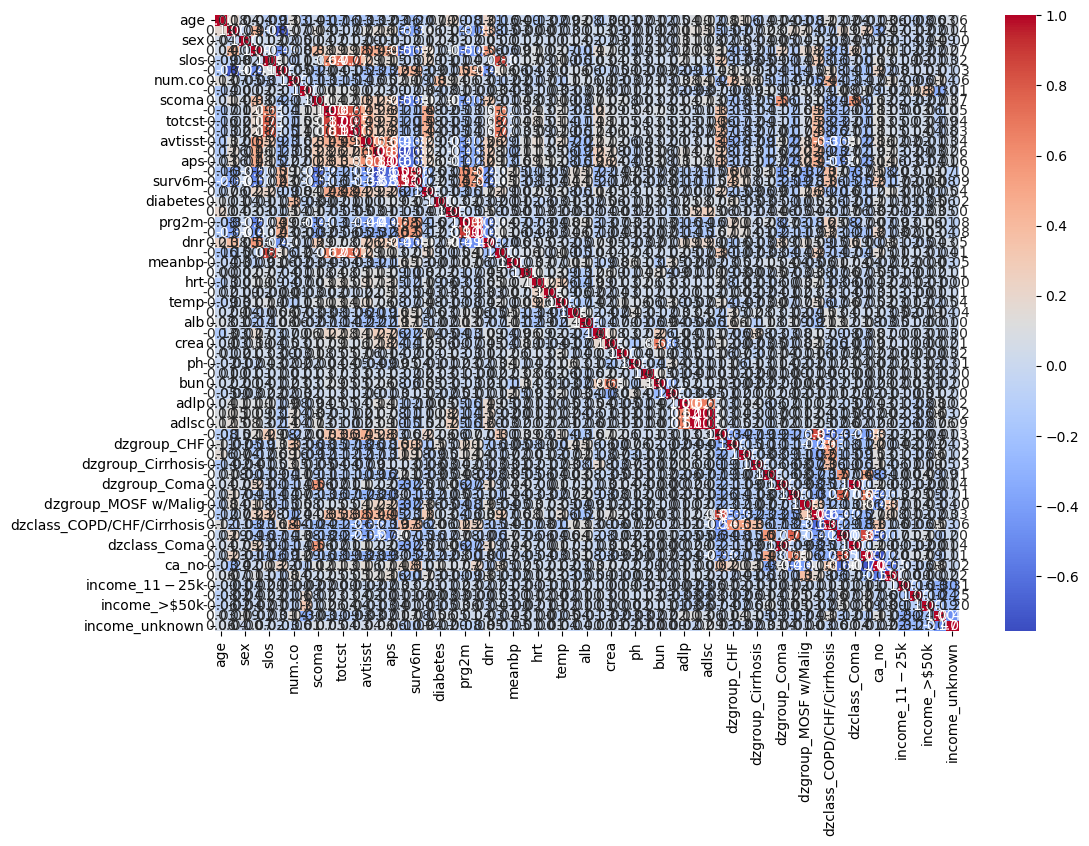

In [18]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()